# 🧼 Limpieza del set de datos 🧼

Primero, vamos a extraer las columnas que nos interesan para nuestro análisis.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

raw_df = pd.read_csv("files/hr_raw_data.csv", index_col=0)

pd.set_option("display.max_columns", None)

In [2]:
raw_df.head(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1


In [3]:
raw_df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

Columna jobrole: 

Sales Executive               381

Research Scientist            325

Laboratory Technician         289

Manufacturing Director        168

Healthcare Representative     155

Manager                       115

Sales Representative           96

Research Director              90

Human Resources                59

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

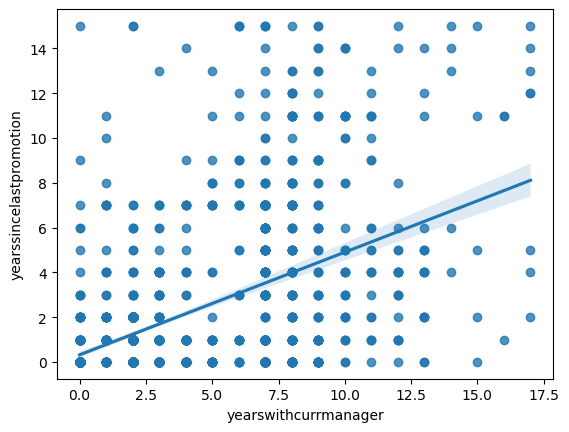

In [5]:
sns.regplot(x= 'yearswithcurrmanager',
                y = 'yearssincelastpromotion', 
                data = raw_df); 

In [6]:
df = pd.DataFrame()

columns_to_import = ["employeenumber","datebirth", "remotework", "education", "gender", "stockoptionlevel", 
                     "percentsalaryhike", "salary", "monthlyincome", "attrition", "joblevel", "jobrole","yearsatcompany", "relationshipsatisfaction", 
                     "environmentsatisfaction", "jobsatisfaction", "yearssincelastpromotion", "yearswithcurrmanager"]

for col in columns_to_import:
    df[col] = raw_df[col] 

In [7]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,attrition,joblevel,jobrole,yearsatcompany,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager
0,1,1972,Yes,3,0,0,13,"195370,00$","16280,83$",No,5,resEArch DIREcToR,20,3,1,3,15,15
1,2,1971,1,4,0,1,14,"199990,00$",NaN,No,5,ManAGeR,33,1,3,3,11,9
2,3,1981,1,2,0,0,11,"192320,00$",NaN,No,5,ManaGER,22,4,3,4,11,15
3,4,1976,False,4,1,2,19,"171690,00$","14307,50$",No,4,ReseArCH DIrECtOr,20,2,1,3,5,6
4,5,1977,0,3,1,1,12,NaN,"12783,92$",No,4,sAleS EXECUtIve,19,4,1,1,2,8


## Limpiando las columnas elegidas

Primero, quitar duplicados

In [8]:
df.duplicated().sum()

64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

Gender: cambiar 1 y 0 por Female y Male.

In [11]:
df['gender'] = df['gender'].map({0: 'F', 1: 'M'})

In [12]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

Remote work: unificar valores

In [13]:
df['remotework'] = df['remotework'].astype(str).str.lower()
df['remotework'] = df['remotework'].replace({
                   'true': 'yes', 'false': 'no', 
                   '1': 'yes', '0': 'no'})

In [14]:
df['remotework'].unique()

array(['yes', 'no'], dtype=object)

Salary y Monthly income: Quitar símbolos y pasarlo a float.

In [15]:
def clean_money(*args):
    resultados = []
    for dato in args:
        try:
            resultados.append(float(dato.replace('$', '').replace(',', '.')))
        except: 
            resultados.append(np.nan)
    return resultados if len(resultados) > 1 else resultados[0]

In [16]:
df[["monthlyincome","salary"]] = df.apply(lambda x: clean_money(x["monthlyincome"], x["salary"]), axis=1, result_type="expand")

In [17]:
df[["monthlyincome","salary"]]

,monthlyincome,salary
0,16280.83,195370.00
1,NaN,199990.00
2,NaN,192320.00
3,14307.50,171690.00
4,12783.92,NaN
...,...,...
1609,8604.17,103250.00
1610,3705.83,44470.00
1611,NaN,100071.84
1612,4492.84,53914.11


Jobrole: ponerlo todo lower case.

In [18]:
df['jobrole'] = df['jobrole'].str.strip().str.replace(" ", "_").str.lower()

In [19]:
df['jobrole']

0            research_director
1                      manager
2                      manager
3            research_director
4              sales_executive
                 ...          
1609           sales_executive
1610     laboratory_technician
1611           sales_executive
1612           sales_executive
1613    manufacturing_director
Name: jobrole, Length: 1614, dtype: object

## Nulos en Salary

Como tenemos monthltincome podemos obtener salary multiplicándolo por 12.

In [20]:
df["salary"].describe()

count      1340.000000
mean      65245.875313
std       45933.029687
min       10090.000000
25%       28111.130000
50%       53914.110000
75%       94607.500000
max      199990.000000
Name: salary, dtype: float64

In [21]:
df[["monthlyincome", "salary"]].isna().sum()

monthlyincome    468
salary           274
dtype: int64

In [22]:
df["salary_from_month"] = df["monthlyincome"]*12 

In [23]:
df[["salary", "salary_from_month"]]

,salary,salary_from_month
0,195370.00,195369.96
1,199990.00,NaN
2,192320.00,NaN
3,171690.00,171690.00
4,NaN,153407.04
...,...,...
1609,103250.00,103250.04
1610,44470.00,44469.96
1611,100071.84,NaN
1612,53914.11,53914.08


In [24]:
df['salary'] = df['salary'].fillna(df['salary_from_month'])

In [25]:
df['salary'].isna().sum()

0

**Objetivo final: ¿los empleado estan satisfechos?**

Nos centramos en si la empresa es igualitaria

PREGUNTAS FINALES: 

 Vamos a separarlo entre género y edad:
  
**GÉNERO**

 -hay repartición equitativa entre el género en la empresa? --> "gender"

 -gana más quién tiene más educación? más hombre o mujer? --> "gender", "education"
 
 -están más satifechos los hombres o las mujeres? en base a salario, ambiente o rango? --> "salary", "gender", "environmentsatisfaction", "joblevel", "jobrole"

**EDAD**

 -cómo es la distribución de edades los empleados? --> "datebirth"

 -gana más quién tiene más educación? según edad --> "datebirth", "education"

 -están más satifechos segun edades? en base a salario, ambiente o rango? --> "salary", "datebirth", "environmentsatisfaction", "joblevel", "jobrole"


Fase 3: Visualizando los datos.

In [26]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,attrition,joblevel,jobrole,yearsatcompany,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month
0,1,1972,yes,3,F,0,13,195370.00,16280.83,No,5,research_director,20,3,1,3,15,15,195369.96
1,2,1971,yes,4,F,1,14,199990.00,NaN,No,5,manager,33,1,3,3,11,9,NaN
2,3,1981,yes,2,F,0,11,192320.00,NaN,No,5,manager,22,4,3,4,11,15,NaN
3,4,1976,no,4,M,2,19,171690.00,14307.50,No,4,research_director,20,2,1,3,5,6,171690.00
4,5,1977,no,3,M,1,12,153407.04,12783.92,No,4,sales_executive,19,4,1,1,2,8,153407.04


In [27]:
#actualizar edades. CREACIÓN COLUMNA 

df["age_2025"] = 2025 - df["datebirth"] 
df["age_2025"] 

0       53
1       54
2       44
3       49
4       48
        ..
1609    38
1610    47
1611    41
1612    38
1613    48
Name: age_2025, Length: 1614, dtype: int64

In [28]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,attrition,joblevel,jobrole,yearsatcompany,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025
0,1,1972,yes,3,F,0,13,195370.00,16280.83,No,5,research_director,20,3,1,3,15,15,195369.96,53
1,2,1971,yes,4,F,1,14,199990.00,NaN,No,5,manager,33,1,3,3,11,9,NaN,54
2,3,1981,yes,2,F,0,11,192320.00,NaN,No,5,manager,22,4,3,4,11,15,NaN,44
3,4,1976,no,4,M,2,19,171690.00,14307.50,No,4,research_director,20,2,1,3,5,6,171690.00,49
4,5,1977,no,3,M,1,12,153407.04,12783.92,No,4,sales_executive,19,4,1,1,2,8,153407.04,48


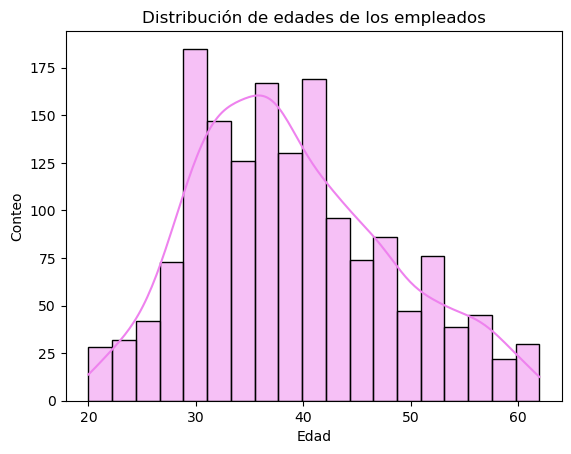

In [31]:
# -cómo es la distribución de edades los empleados? --> "datebirth"

sns.histplot(x = "age_2025", 
             data = df, 
             color = "violet", 
             kde = True)

plt.title('Distribución de edades de los empleados')
plt.xlabel('Edad')
plt.ylabel('Conteo');

**Vamos a hacer división generacional:**

- Generación Baby Boomers (nacidos entre 1945 y 1964)

- Generación X (nacidos entre 1965 y 1981)

- Generación Y o Millennials (nacidos entre 1982 y 1994)

- Generación Z o Centennials (nacidos entre 1995 y 2009)

In [ ]:
#Dividimos por generaciones 
df["age_2025"].describe().T.reset_index()

,index,age_2025
0,count,1614.000000
1,mean,38.923792
2,std,9.101332
3,min,20.000000
4,25%,32.000000
5,50%,38.000000
6,75%,45.000000
7,max,62.000000


In [35]:
def asignacion_generacion(datebirth):
    if datebirth >= 1995:
        return 'Gen Z'
    elif datebirth >=1981:
        return 'Millennial'
    elif datebirth >=1965:
        return 'Gen X'
    else:
        return 'Baby Boomer'
    
df["generation"] = df['datebirth'].apply(asignacion_generacion)
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,attrition,joblevel,jobrole,yearsatcompany,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025,generation
0,1,1972,yes,3,F,0,13,195370.00,16280.83,No,5,research_director,20,3,1,3,15,15,195369.96,53,Gen X
1,2,1971,yes,4,F,1,14,199990.00,NaN,No,5,manager,33,1,3,3,11,9,NaN,54,Gen X
2,3,1981,yes,2,F,0,11,192320.00,NaN,No,5,manager,22,4,3,4,11,15,NaN,44,Millennial
3,4,1976,no,4,M,2,19,171690.00,14307.50,No,4,research_director,20,2,1,3,5,6,171690.00,49,Gen X
4,5,1977,no,3,M,1,12,153407.04,12783.92,No,4,sales_executive,19,4,1,1,2,8,153407.04,48,Gen X


COMPROBACIÓN FUNCIÓN

In [36]:
asignacion_generacion(1993)

'Millennial'

In [37]:
asignacion_generacion(1985)

'Millennial'

In [38]:
asignacion_generacion(1955)

'Baby Boomer'

In [39]:
asignacion_generacion(2009)


'Gen Z'

In [40]:
df_generation = df.groupby('generation')['age_2025'].describe()

df_generation

,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
Baby Boomer,15.0,61.333333,0.487950,61.0,61.0,61.0,62.0,62.0
Gen X,404.0,50.905941,4.425963,45.0,47.0,50.0,55.0,60.0
Gen Z,282.0,26.925532,2.807867,20.0,25.0,28.0,29.0,30.0
Millennial,913.0,36.959474,3.896059,31.0,34.0,37.0,40.0,44.0


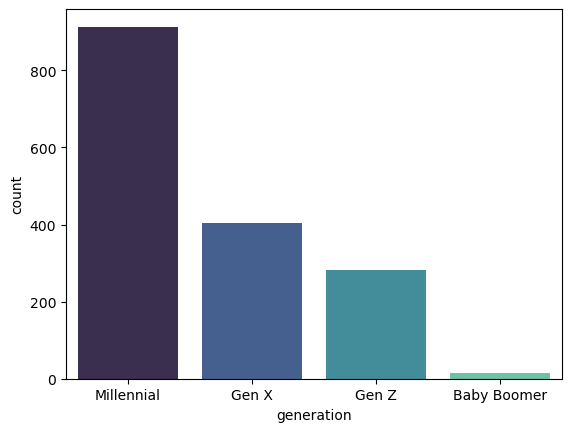

In [41]:
#vamos a hacer un countplot

sns.countplot(x='generation', data=df, palette='mako', order = ["Millennial", "Gen X", "Gen Z", "Baby Boomer"]);

Vemos que no es inclusiva. La mayoria son millenials. Pocos baby boomer porque muchos seguro se jubilan. pero no es algo particular de la empresa sino que es algo general del mercado laboral, le grueso de la poblacionm activa se concentra enm millenials

In [42]:
conteo = df['generation'].value_counts()

In [43]:
df_pie = df.groupby("generation")["employeenumber"].count().reset_index()

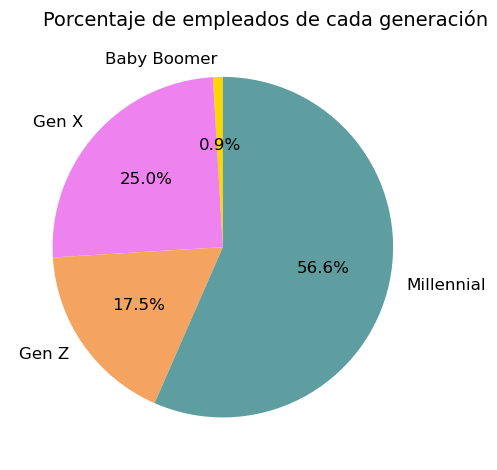

In [60]:
colores = ["gold", "violet", "sandybrown", "cadetblue"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("employeenumber", labels= "generation",
        data = df_pie, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 12}, 
        startangle=90)

plt.title('Porcentaje de empleados de cada generación', fontsize=14, x=0.6)
plt.tight_layout();


**Miramos el salario por generación:**

Hay un valor de salary que es dos órdenes de magnitud mayor que los demás (10E6). Lo filtramos y llamamos a la variable clean_salary.

In [61]:
df["salary"].describe()

count    1.614000e+03
mean     6.558843e+04
std      5.273783e+04
min      1.009000e+04
25%      2.811113e+04
50%      5.391411e+04
75%      9.420500e+04
max      1.118004e+06
Name: salary, dtype: float64

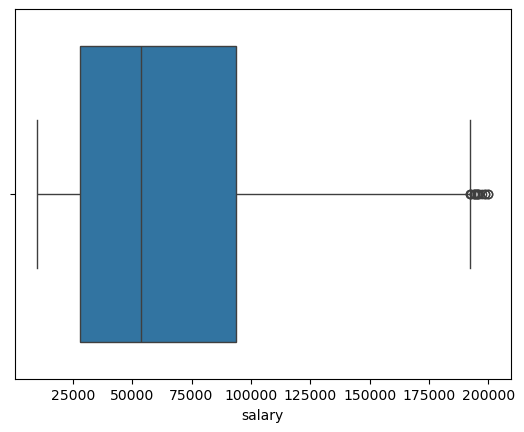

In [62]:
clean_salary = df["salary"][df["salary"] != 1.118004E+06]

sns.boxplot(x=clean_salary, data=df);

In [ ]:
df_california = pd.read_csv("files/labor_force_participation_rate_by_age_group.csv")

pd.set_option("display.max_columns", None)

df_california.head()

,Area Type,Area Name,Date,Year,Month,Age 16-19,Age 20-24,Age 25-34,Age 35-44,Age 45-54,Age 55-64,Age 65+
0,State,California,2/1/2008,2008,February,0.358,0.724,0.816,0.816,0.811,0.651,0.146
1,State,California,3/1/2008,2008,March,0.354,0.722,0.816,0.817,0.811,0.653,0.147
2,State,California,4/1/2008,2008,April,0.349,0.722,0.815,0.818,0.812,0.655,0.149
3,State,California,5/1/2008,2008,May,0.347,0.722,0.816,0.820,0.811,0.655,0.150
4,State,California,6/1/2008,2008,June,0.344,0.721,0.816,0.822,0.810,0.654,0.153


Mirar el DataFrame original para verificar el año del archivo

In [64]:
df_2023_calif=df_california[df_california["Year"]==2023]

In [65]:
df_2023_calif.select_dtypes( exclude="O").describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12.0,2023.000000,0.000000,2023.000,2023.00000,2023.000,2023.00000,2023.000
Age 16-19,12.0,0.278000,0.007422,0.267,0.27150,0.278,0.28525,0.288
Age 20-24,12.0,0.660417,0.005567,0.655,0.65600,0.658,0.66575,0.669
Age 25-34,12.0,0.816583,0.003919,0.811,0.81300,0.817,0.82025,0.822
Age 35-44,12.0,0.818667,0.002270,0.814,0.81775,0.819,0.82025,0.822
Age 45-54,12.0,0.801917,0.002193,0.800,0.80075,0.801,0.80250,0.806
Age 55-64,12.0,0.653000,0.001044,0.652,0.65200,0.653,0.65300,0.655
Age 65+,12.0,0.191000,0.002374,0.186,0.19075,0.191,0.19200,0.195


Gana mas quién tiene mas educacion o según su edad

In [66]:
df.head()

,employeenumber,datebirth,remotework,education,gender,stockoptionlevel,percentsalaryhike,salary,monthlyincome,attrition,joblevel,jobrole,yearsatcompany,relationshipsatisfaction,environmentsatisfaction,jobsatisfaction,yearssincelastpromotion,yearswithcurrmanager,salary_from_month,age_2025,generation
0,1,1972,yes,3,F,0,13,195370.00,16280.83,No,5,research_director,20,3,1,3,15,15,195369.96,53,Gen X
1,2,1971,yes,4,F,1,14,199990.00,NaN,No,5,manager,33,1,3,3,11,9,NaN,54,Gen X
2,3,1981,yes,2,F,0,11,192320.00,NaN,No,5,manager,22,4,3,4,11,15,NaN,44,Millennial
3,4,1976,no,4,M,2,19,171690.00,14307.50,No,4,research_director,20,2,1,3,5,6,171690.00,49,Gen X
4,5,1977,no,3,M,1,12,153407.04,12783.92,No,4,sales_executive,19,4,1,1,2,8,153407.04,48,Gen X


In [67]:
df[["salary","education","generation"]]

,salary,education,generation
0,195370.00,3,Gen X
1,199990.00,4,Gen X
2,192320.00,2,Millennial
3,171690.00,4,Gen X
4,153407.04,3,Gen X
...,...,...,...
1609,103250.00,1,Millennial
1610,44470.00,2,Gen X
1611,100071.84,5,Millennial
1612,53914.11,4,Millennial


In [68]:
df["education"]=pd.cut(df["education"], bins=5, labels=["HS", "Associate’s","Bachelor’s","Master’s","Doctorate’s"])

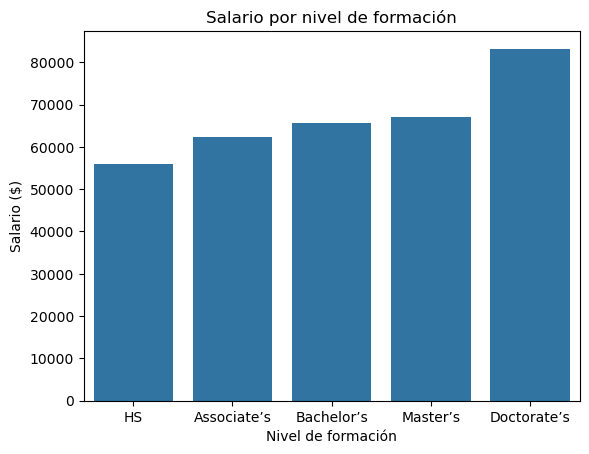

In [71]:
sns.barplot(x="education",y= clean_salary,data=df,errorbar=None)

plt.title('Salario por nivel de formación')
plt.xlabel('Nivel de formación')
plt.ylabel('Salario ($)'); # Salario por puesto

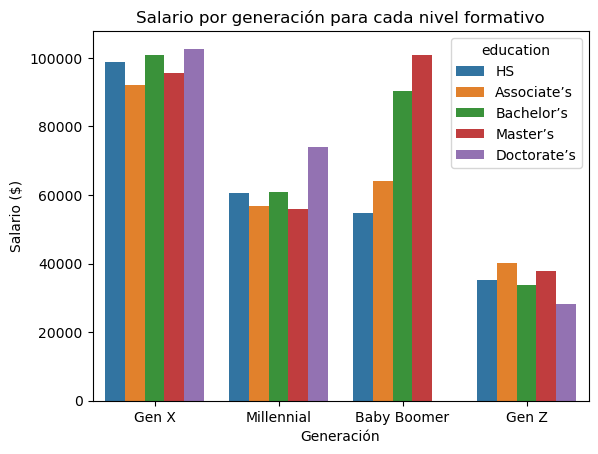

In [ ]:
sns.barplot(x="generation",y= clean_salary, hue="education",data=df,errorbar=None)

plt.title('Salario por generación para cada nivel formativo')
plt.xlabel('Generación')
plt.ylabel('Salario ($)');

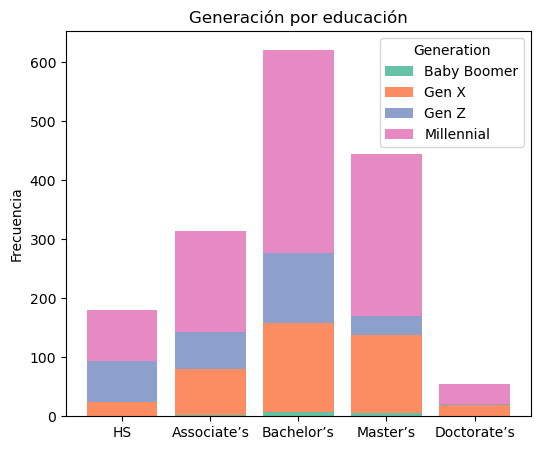

In [73]:
# Contar las ocurrencias de las combinaciones de 'categoria' y 'subcategoria'
count_data = pd.crosstab(df['education'], df['generation'])

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 5))

# Apilar las barras usando plt.bar con bottom acumulado
bottom = np.zeros(len(count_data))  # Base inicial para cada categoría
colores = sns.color_palette("Set2", len(count_data.columns))  # Colores para cada subcategoría

# Para cada subcategoría, apilamos las barras
for i, col in enumerate(count_data.columns):
    ax.bar(count_data.index, count_data[col], bottom=bottom, color=colores[i], label=col)
    bottom += count_data[col]  # Acumulamos para la siguiente parte de la barra

# Agregar etiquetas y leyenda
ax.set_ylabel("Frecuencia")
ax.set_title("Generación por educación")
ax.legend(title="Generation")

plt.show()

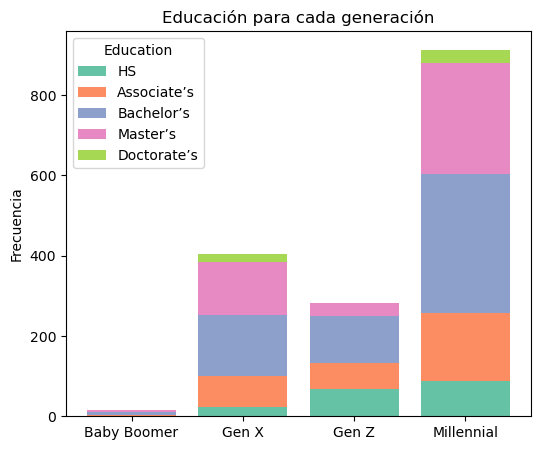

In [74]:
# Contar las ocurrencias de las combinaciones de 'categoria' y 'subcategoria'
count_data = pd.crosstab(df['generation'], df['education'])

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 5))

# Apilar las barras usando plt.bar con bottom acumulado
bottom = np.zeros(len(count_data))  # Base inicial para cada categoría
colores = sns.color_palette("Set2", len(count_data.columns))  # Colores para cada subcategoría

# Para cada subcategoría, apilamos las barras
for i, col in enumerate(count_data.columns):
    ax.bar(count_data.index, count_data[col], bottom=bottom, color=colores[i], label=col)
    bottom += count_data[col]  # Acumulamos para la siguiente parte de la barra

# Agregar etiquetas y leyenda
ax.set_ylabel("Frecuencia")
ax.set_title("Educación para cada generación")
ax.legend(title="Education")

plt.show()

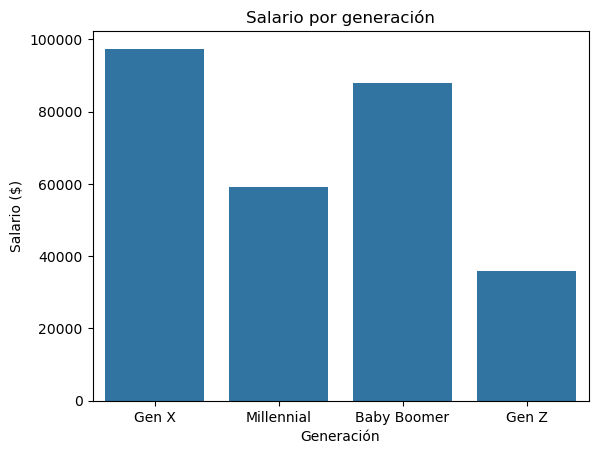

In [75]:
sns.barplot(x="generation",y= clean_salary,data=df,errorbar=None)
plt.title('Salario por generación')
plt.xlabel('Generación')
plt.ylabel('Salario ($)');

Las personas con doctorado reciben más salario, menos en GenZ. 

Entre generaciones, cobran más los de la GenX, seguidos de los Millennial. Los que menos cobran son la GenZ (considerar la falta de experiencia). 

En proporción, se invierte más en capital humano en Millenials. Teniendo en cuenta que los Millenials representan una mayoría en la población activa, quizás la empresa podría enfocarse en "contentar" a este grupo.

''

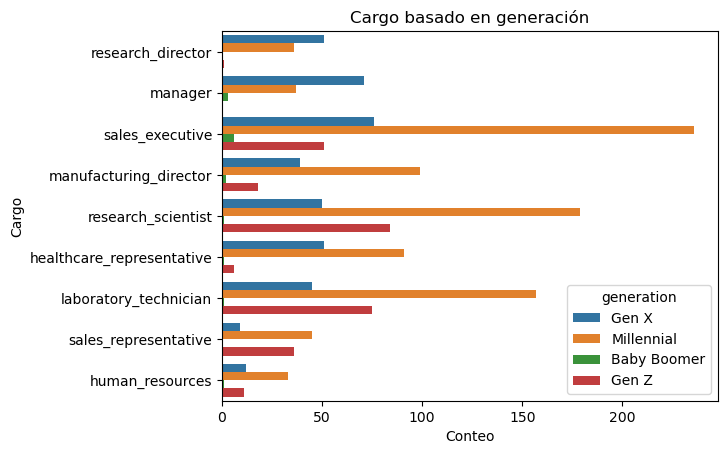

In [76]:
# Gráfico principal
sns.countplot(
    y="jobrole",
    data=df,
    hue="generation",
    )
plt.title('Cargo basado en generación')
plt.xlabel('Conteo')
plt.ylabel('Cargo')
;

baby boomers solo son managers y sales exec y manufacturing directors, mientras que Millenials se esparcen en todos los job roles. Gen Z, al ser generacion mas joven, no tiene la expeiencia suficiente para ser research director, pero estan presente en el resto de los roles. la reparticion de Gen X se ve mas equitativa en todos lo roles y tiene mas presencia en research director. 

oportunidades de promocion y capacitacion para Millenials y Gen Z

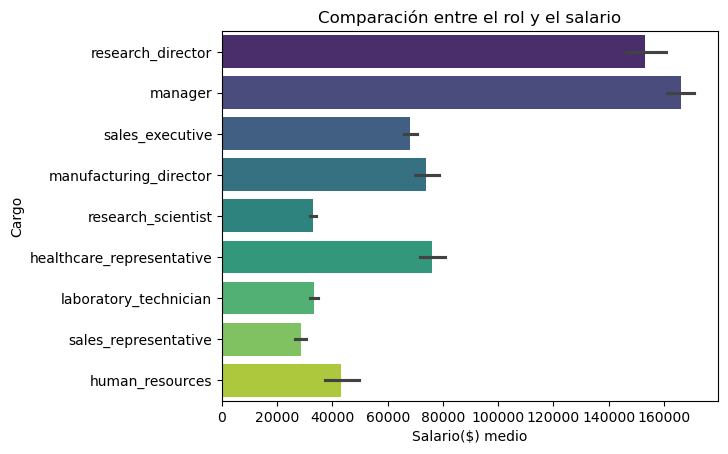

In [ ]:
sns.barplot(x= clean_salary, y='jobrole', data=df, palette='viridis', errorbar='ci')
plt.title("Comparación entre el rol y el salario")
plt.xlabel('Salario($) medio')
plt.ylabel('Cargo');


research director y manager son las cargos que mas ganan. (pendiente con comparar con edades y genero) 

In [80]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [98]:
def distribucion_gen(col, datos, variable, titulo, titulo_var):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(
        x=col,
        data=datos,
        palette="Accent",
        hue=variable,
        ax=ax
    )
    ax.set_title(titulo, fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Generación')
    ax.set_ylabel('Conteo')

    # Gráfico insertado (zoom)
    axins = inset_axes(ax, width="40%", height="40%", loc='upper right')

    # Escogemos generaciones poco representadas (puedes adaptar esto según tus datos)
    low_gen = datos[col].value_counts().nsmallest(1).index
    df_low_gen = datos[datos[col].isin(low_gen)]

    sns.countplot(
        x=col,
        data=df_low_gen,
        hue=variable,
        palette="Accent",
        ax=axins
    )
    axins.tick_params(axis='x')
    axins.legend_.remove()  # opcional: eliminar la leyenda duplicada

    # Mover la leyenda fuera del gráfico principal si quieres
    ax.legend(title=titulo_var, bbox_to_anchor=(1.05, 1), loc='upper left')
 
    plt.tight_layout() 
    plt.show()

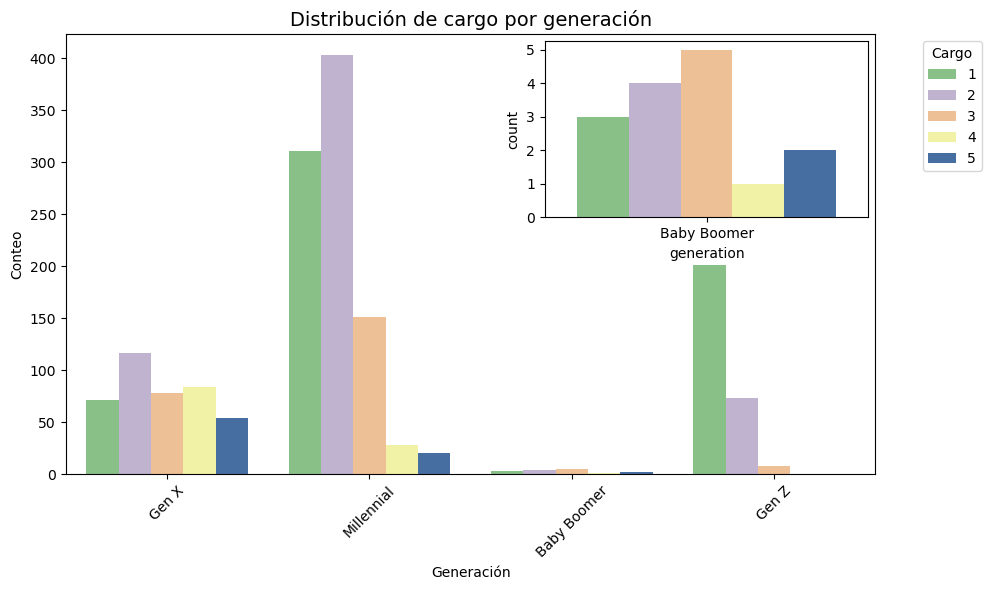

In [99]:
distribucion_gen("generation", df, "joblevel","Distribución de cargo por generación", "Cargo")

Gen X tiene el nivel de puesto promedio más alto, seguido de cerca por los Baby Boomers.
Millennials tienen un nivel de puesto más bajo que Gen X y Baby Boomers, pero superior a Gen Z, que presenta el nivel más bajo.
Si el objetivo de la empresa es fomentar la retención y el crecimiento profesional de los empleados jóvenes, podría ser útil analizar oportunidades de promoción y capacitación para Millennials y Gen Z

Gen X y Baby Boomers tienen los niveles de puesto más altos en promedio.

Esto sugiere que las generaciones más antiguas ocupan roles más altos, lo que es esperable dado que han tenido más tiempo para avanzar en su carrera.
La presencia de valores atípicos sugiere que algunos empleados jóvenes han alcanzado niveles altos, pero son pocos casos.
La jerarquía de puestos sigue una estructura esperada basada en la experiencia.

La movilidad hacia niveles altos parece ser más común en generaciones mayores.

Podría ser interesante investigar si los Millennials y Gen Z enfrentan barreras para la promoción.

No se observa una gran disparidad entre generaciones, lo que indica que la satisfacción laboral es relativamente estable entre todos los grupos.


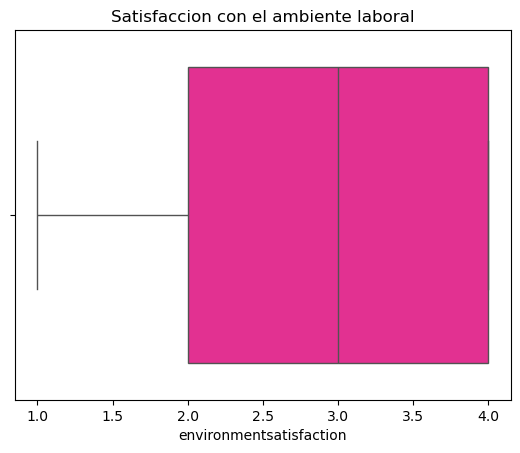

In [88]:
sns.boxplot(x=df['environmentsatisfaction'][df['environmentsatisfaction']<= 4],data= df, color='deeppink')
plt.title("Satisfaccion con el ambiente laboral");

👆 se filtra la escala de satisfaccion en el ambiente porque por encima de 4 era un aprox de 7% de los empleados

In [89]:
clean_en_sat = df['environmentsatisfaction'][df['environmentsatisfaction']<= 4]

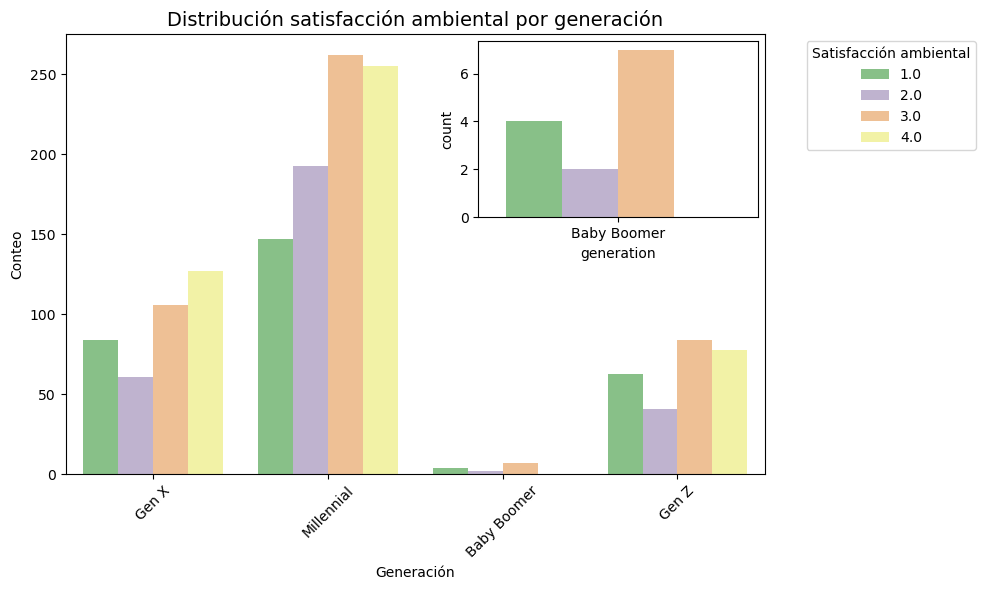

In [100]:
distribucion_gen("generation", df, clean_en_sat, "Distribución satisfacción ambiental por generación", "Satisfacción ambiental")

👆 los baby boomers no estan contentos pero los millenials si. Gen X está polarizado entre menos satisfechos y más satisfechos 

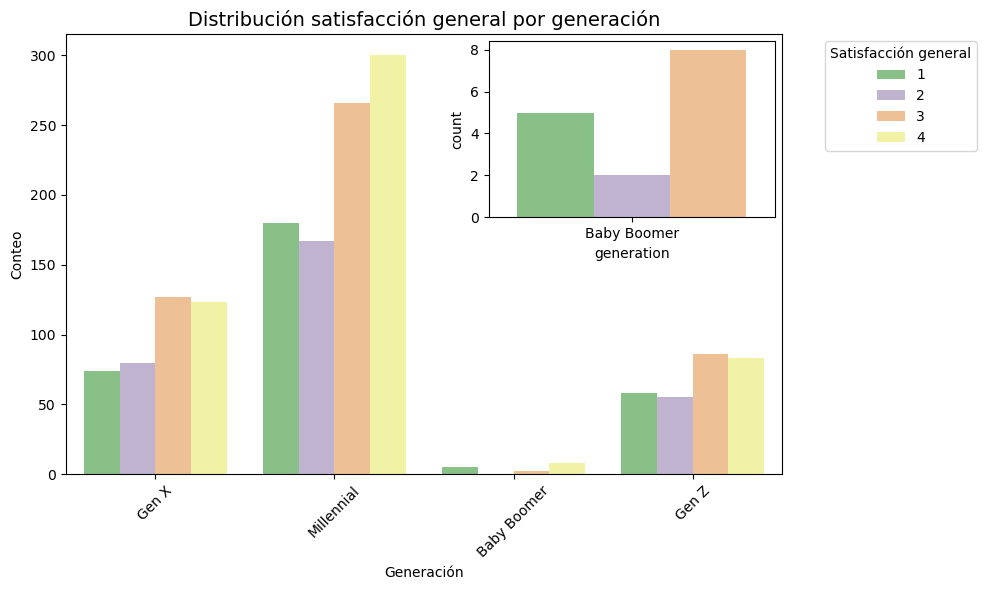

In [101]:
distribucion_gen("generation", df, "jobsatisfaction", "Distribución satisfacción general por generación", "Satisfacción general")

👆 la satisfaccion general es buena 

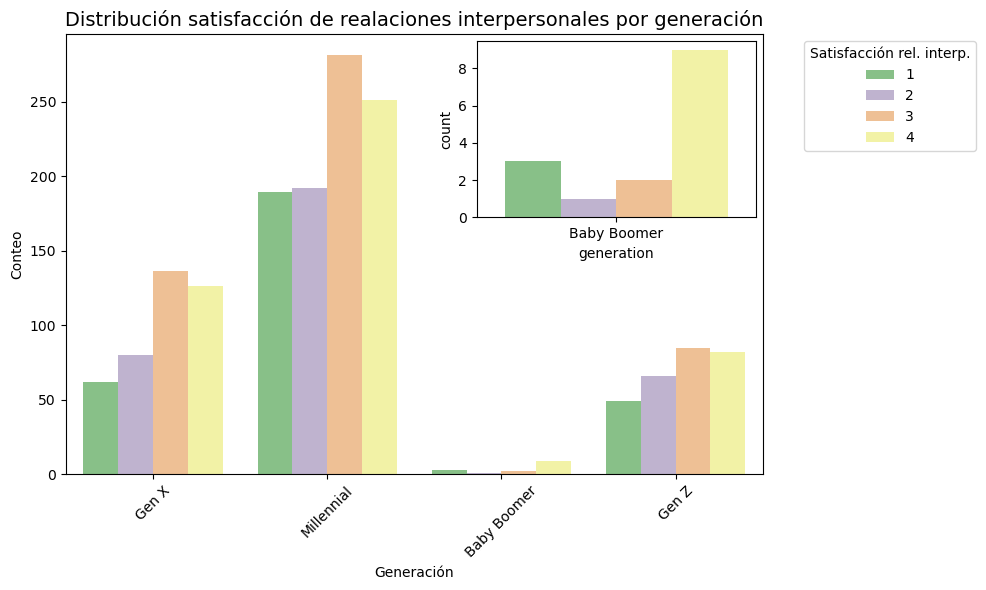

In [103]:
distribucion_gen("generation", df, "relationshipsatisfaction", "Distribución satisfacción de realaciones interpersonales por generación", "Satisfacción rel. interp.")

👆 en general la satisfaccion de relaciones interpersonales se encuentra entre niveles 3 y 4; es decir, buena  

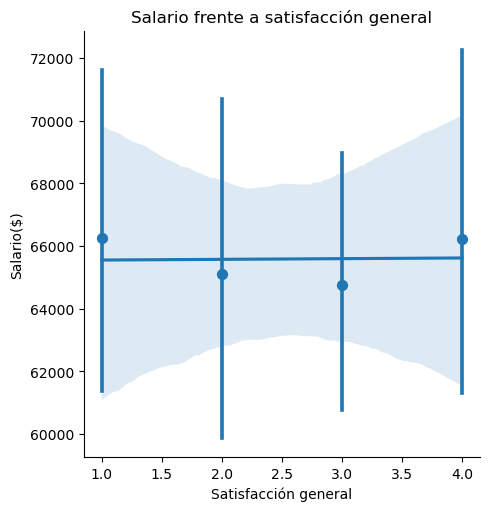

In [104]:
sns.lmplot(y= "salary", x='jobsatisfaction', data=df, x_estimator= np.mean) #convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Salario frente a satisfacción general")
plt.xlabel('Satisfacción general')
plt.ylabel('Salario($)')
plt.show()

👆 no hay realcion entre la satisfaccion general  y el nivel de salario. parece que los empleados valoran otras cosas como relaciones y el ambiente 

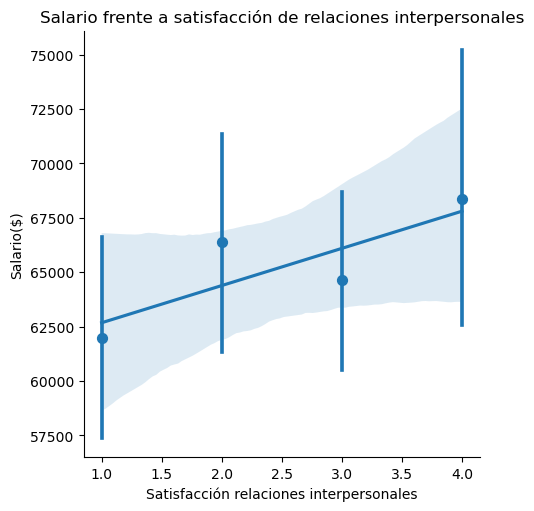

In [105]:
sns.lmplot(y= "salary", x='relationshipsatisfaction', data=df, x_estimator= np.mean)#convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Salario frente a satisfacción de relaciones interpersonales")
plt.xlabel('Satisfacción relaciones interpersonales')
plt.ylabel('Salario($)')
plt.show()

In [106]:
df[['salary', 'relationshipsatisfaction']].corr(method='pearson')


,salary,relationshipsatisfaction
salary,1.000000,0.034966
relationshipsatisfaction,0.034966,1.000000


 👆 no hay relacion entre la satisfaccion entre relaciones interpersonales en el trabajo y el salario.

In [107]:
df_filtrado_env = df[df['environmentsatisfaction']<= 4]

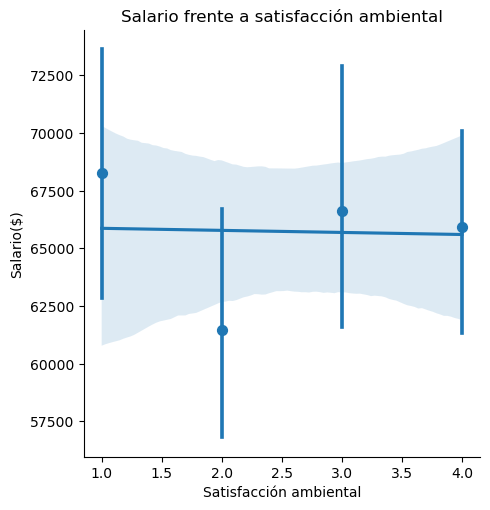

In [108]:
sns.lmplot(y= "salary", x= "environmentsatisfaction", data=df_filtrado_env, x_estimator= np.mean)#convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Salario frente a satisfacción ambiental")
plt.xlabel('Satisfacción ambiental')
plt.ylabel('Salario($)')
plt.show()

👆 no hay relacion entre la satisfaccion ambiental y el nivel salario 

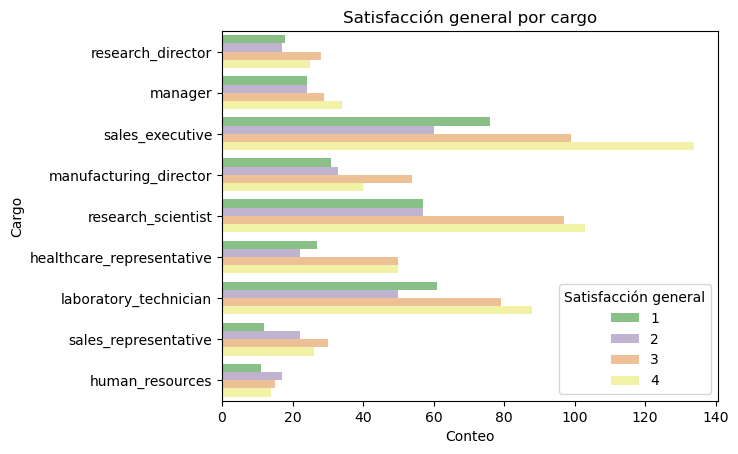

In [109]:
sns.countplot(
    y="jobrole",
    data=df,
    palette="Accent",
    hue= "jobsatisfaction"
)
plt.title("Satisfacción general por cargo")
plt.xlabel('Conteo')
plt.ylabel('Cargo')
plt.legend(title='Satisfacción general');

👆sales execs y laboratory techs son los menos satisfechos. Human resources tambien presente insatisfacción 

Nos centramos en los roles con menor satisfacción.

In [110]:
# Filtrar los roles específicos
roles_deseados = ['sales_executive','laboratory_technician', 'human_resources']
# Seleccionar solo las filas con esos roles y mostrar columnas específicas
df_filtrado = df[df['jobrole'].isin(roles_deseados)][
    ['jobrole', 'remotework', 'stockoptionlevel', 'yearssincelastpromotion', 'yearswithcurrmanager', 'yearsatcompany']
].reset_index()
# Mostrar resultado
df_filtrado.sample(20)

,index,jobrole,remotework,stockoptionlevel,yearssincelastpromotion,yearswithcurrmanager,yearsatcompany
624,1440,human_resources,yes,0,4,7,10
57,175,sales_executive,no,0,1,7,9
300,702,laboratory_technician,yes,1,0,7,8
656,1528,laboratory_technician,yes,1,0,4,5
347,796,laboratory_technician,yes,0,1,2,4
339,775,sales_executive,no,0,1,2,5
616,1422,laboratory_technician,yes,0,0,0,1
639,1489,sales_executive,yes,1,0,2,5
171,409,sales_executive,no,2,0,8,10
611,1415,laboratory_technician,no,1,0,1,1


In [111]:
# Usar pd.crosstab para obtener conteos cruzados
pd.crosstab(df_filtrado['jobrole'], df_filtrado['remotework'], normalize='index') * 100

remotework,no,yes
jobrole,,
human_resources,40.350877,59.649123
laboratory_technician,36.690647,63.309353
sales_executive,36.856369,63.143631


In [112]:
pd.crosstab(df_filtrado['jobrole'], df_filtrado['stockoptionlevel'], normalize='index') * 100


stockoptionlevel,0,1,2,3
jobrole,,,,
human_resources,45.614035,42.105263,5.263158,7.017544
laboratory_technician,40.647482,44.604317,7.553957,7.194245
sales_executive,42.547425,38.211382,13.550136,5.691057


In [114]:
years_at_company = pd.crosstab(df_filtrado['jobrole'], df_filtrado['yearsatcompany'], normalize='index') * 100

In [115]:
company_filtered = years_at_company.loc[:, years_at_company.columns <= 5]
company_filtered_1 = years_at_company.loc[:, (years_at_company.columns > 5) & (years_at_company.columns <= 10)]
company_filtered_2 = years_at_company.loc[:, (years_at_company.columns > 10) & (years_at_company.columns <= 15)]
company_filtered_3 = years_at_company.loc[:, (years_at_company.columns > 15) & (years_at_company.columns <= 20)]


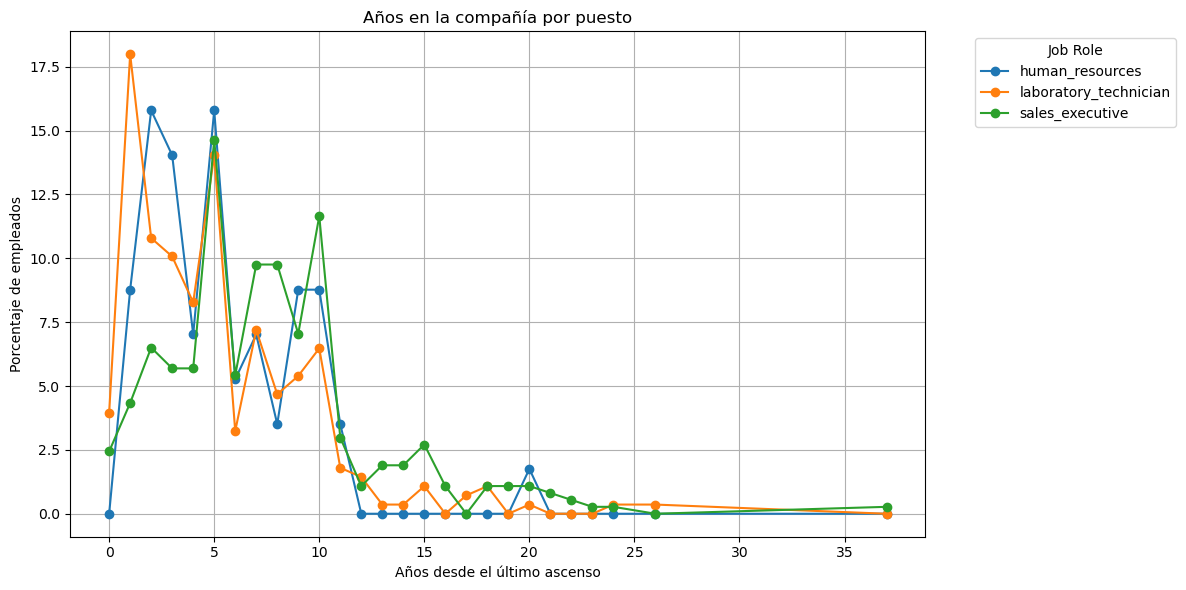

In [116]:
# Asegúrate de que las columnas (años) estén ordenadas numéricamente
crosstab = years_at_company.reindex(sorted(years_at_company.columns), axis=1)
# Transponer para que los años estén en el eje X
crosstab.T.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Años en la compañía por puesto')
plt.xlabel('Años desde el último ascenso')
plt.ylabel('Porcentaje de empleados')
plt.legend(title='Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

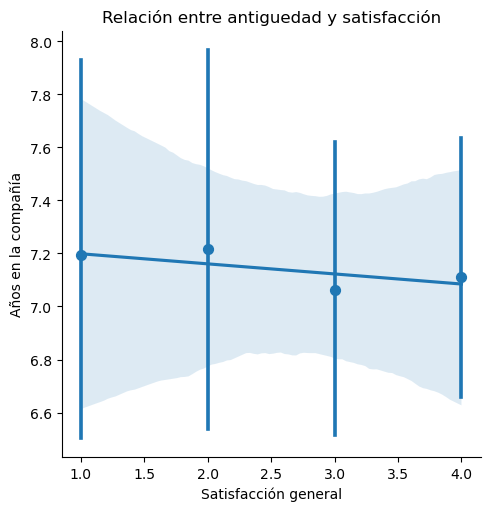

In [117]:
sns.lmplot(y= 'yearsatcompany', x= 'jobsatisfaction', data=df, x_estimator= np.mean)#convertir las columnas de satisfaccion a categóricas, gráficas poco claras
plt.title("Relación entre antiguedad y satisfacción")
plt.xlabel('Satisfacción general')
plt.ylabel('Años en la compañía')
plt.show()

In [118]:
df[['stockoptionlevel', 'jobsatisfaction']].corr(method='pearson')

,stockoptionlevel,jobsatisfaction
stockoptionlevel,1.000000,0.013897
jobsatisfaction,0.013897,1.000000


In [119]:
raw_df.corr(numeric_only=True)['jobsatisfaction'].abs().sort_values(ascending=False)

jobsatisfaction             1.000000
numcompaniesworked          0.053508
gender                      0.038739
yearswithcurrmanager        0.037906
environmentsatisfaction     0.027224
dailyrate                   0.024858
joblevel                    0.024175
percentsalaryhike           0.023584
distancefromhome            0.022783
yearssincelastpromotion     0.020727
jobinvolvement              0.018025
relationshipsatisfaction    0.014094
datebirth                   0.013926
employeenumber              0.012459
education                   0.012129
yearsatcompany              0.011214
hourlyrate                  0.009310
stockoptionlevel            0.006757
trainingtimeslastyear       0.000795
employeecount                    NaN
numberchildren                   NaN
Name: jobsatisfaction, dtype: float64

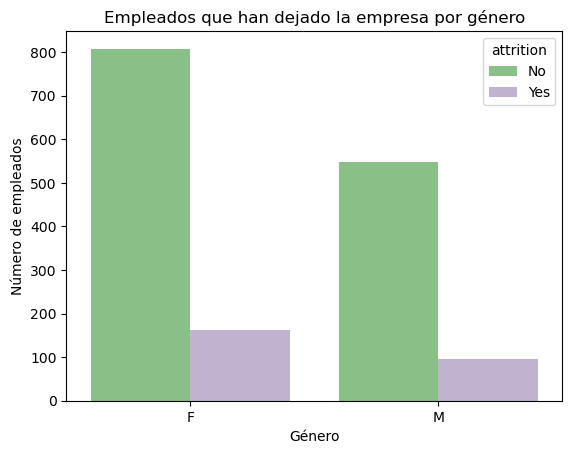

In [120]:
# VER DÓNDE PONEMOS ESTO!!!!!!!!!!!!!!!!!!!!!!!!!!!!
sns.countplot(
    x="gender",
    data=df,
    palette="Accent",
    hue= "attrition"
)
plt.title("Empleados que han dejado la empresa por género")
plt.xlabel('Género')
plt.ylabel('Número de empleados');



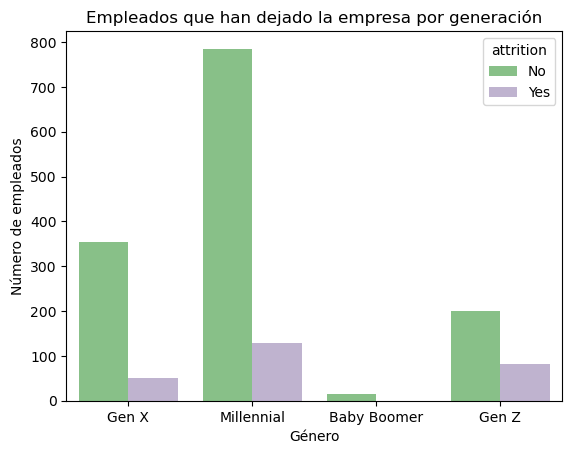

In [121]:
# VER DÓNDE PONEMOS ESTO!!!!!!!!!!!!!!!!!!!!!!!!!!!!
sns.countplot(
    x="generation",
    data=df,
    palette="Accent",
    hue= "attrition"
)
plt.title("Empleados que han dejado la empresa por generación")
plt.xlabel('Género')
plt.ylabel('Número de empleados');


In [122]:
crosstab = pd.crosstab(df_filtrado['jobrole'], df_filtrado['yearssincelastpromotion'], normalize='index') * 100


In [123]:
crosstab_filtered = crosstab.loc[:, crosstab.columns <= 5]

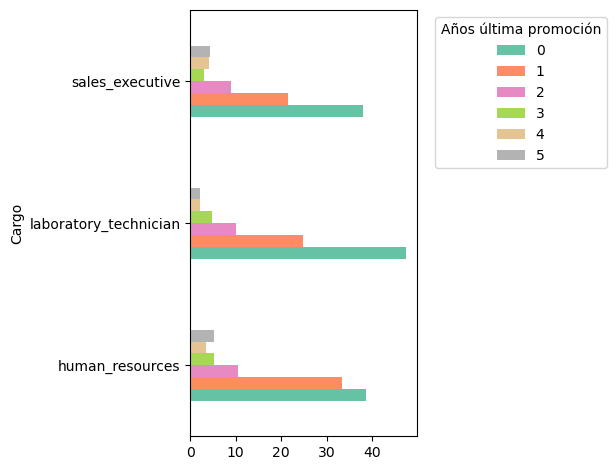

In [132]:
crosstab_filtered.plot(kind='barh', stacked=False, colormap='Set2'); 
plt.ylabel('Cargo')
# Mover la leyenda fuera del gráfico
plt.legend(title='Años última promoción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta automáticamente para que no se corte nada

In [126]:
pd.crosstab(df_filtrado['jobrole'], df_filtrado['yearswithcurrmanager'], normalize='index') * 100

yearswithcurrmanager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
jobrole,,,,,,,,,,,,,,,,,
human_resources,22.807018,5.263158,28.070175,8.771930,12.280702,0.000000,3.508772,8.771930,8.771930,1.754386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
laboratory_technician,24.460432,3.237410,28.776978,8.633094,7.194245,1.079137,1.438849,13.669065,6.115108,1.079137,1.079137,0.719424,0.000000,0.719424,0.359712,0.359712,1.079137
sales_executive,10.840108,4.878049,16.802168,10.840108,7.588076,3.523035,1.897019,24.932249,6.504065,5.149051,2.168022,1.355014,1.626016,1.355014,0.271003,0.000000,0.271003


¿Hay repartición equitativa entre el género en la empresa?

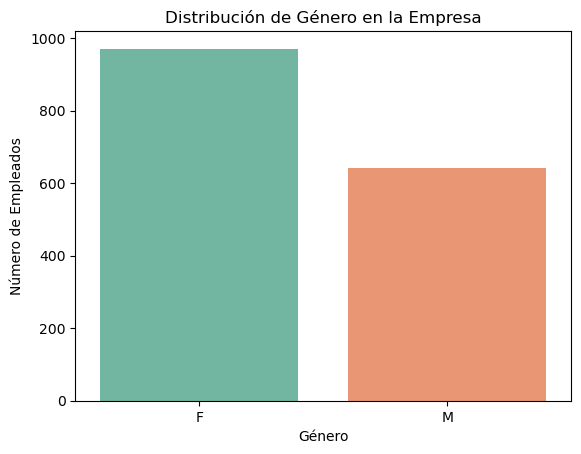

In [127]:
sns.countplot(x='gender', data=df, palette='Set2')

plt.title("Distribución de Género en la Empresa")
plt.xlabel("Género")
plt.ylabel("Número de Empleados")
plt.show()

Utilizamos countplot ppara ver cuántos empleados hay de cada género en la empresa. Este gráfico nos muestra facilemnte la distribución de género

Conclusión:
Vemos que hay una diferencia en la cantidad de empleados entre géneros. Si la barra de las mujeres es más alta que la de los hombres, es que hay más.


¿Gana más quien tiene más educación? ¿Y hay diferencias entre hombres y mujeres?

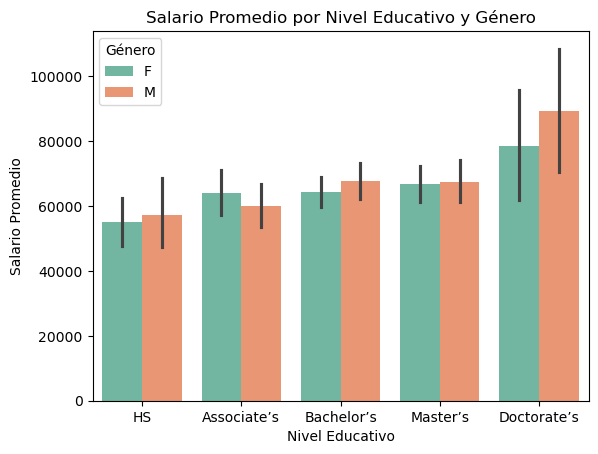

In [128]:
sns.barplot(x='education', y=clean_salary, hue='gender', data=df, palette='Set2')

plt.title("Salario Promedio por Nivel Educativo y Género")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.legend(title="Género")

plt.show()

Utilizamos un barplot porque asi comparar fácilmente el salario promedio entre diferentes niveles educativos y, dentro de cada nivel, entre hombres y mujeres. ​

Conclusión:
Observamos en casi todas que a mayor nivel educativo, el salario promedio es más alto. Además, podemos ver diferencias salariales entre hombres y mujeres dentro de cada nivel educativo. En Associate's las mujeres ganan más. En HS, Bachelor's y Doctorate's los hombres ganan más.
Esto podría ser porque hay mas de ese genero en cada nivel educativo?

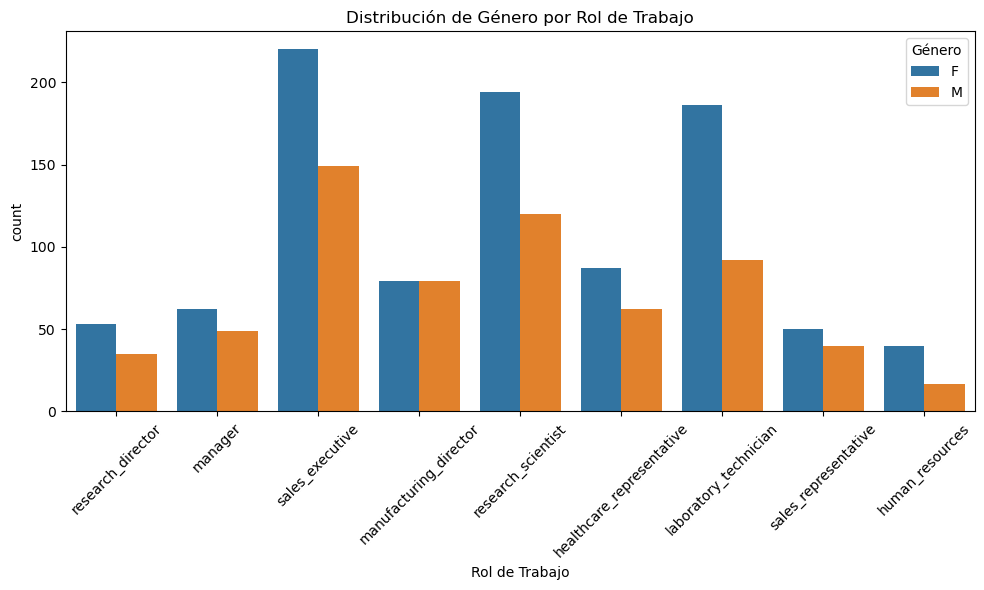

In [133]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='jobrole', hue='gender')
plt.xticks(rotation=45)
plt.title('Distribución de Género por Rol de Trabajo')
plt.xlabel('Rol de Trabajo')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

Usamos un countplot para contar y comparar categorías, en este caso, cuántos hombres y mujeres hay en cada tipo de rol de trabajo.

Conclusión:
La gráfica permite observar con claridad la distribución de género en cada rol de trabajo dentro de la empresa.
Conclusión:
Vemos que las mujeres son mayoría en varios roles, especialmente en puestos como Human Resources, Sales Representative y Healthcare Representative. Por otro lado, los hombres tienen mayor presencia en roles técnicos o especializados, como Laboratory Technician, Research Scientist y Manufacturing Director.

También se nota que en algunos roles como Sales Executive o Manager, la distribución está más equilibrada entre ambos géneros.

Esto sugiere que, aunque las mujeres están presentes en todos los tipos de trabajo, tienden a concentrarse más en ciertos roles administrativos o comerciales, mientras que los hombres dominan en áreas más técnicas o de liderazgo industrial. Esto puede ser clave para revisar políticas de igualdad de acceso a diferentes tipos de cargos dentro de la organización.


 -están más satifechos los hombres o las mujeres? en base a salario, ambiente o rango? --> "salary", "gender", "environmentsatisfaction", "joblevel", "jobrole"

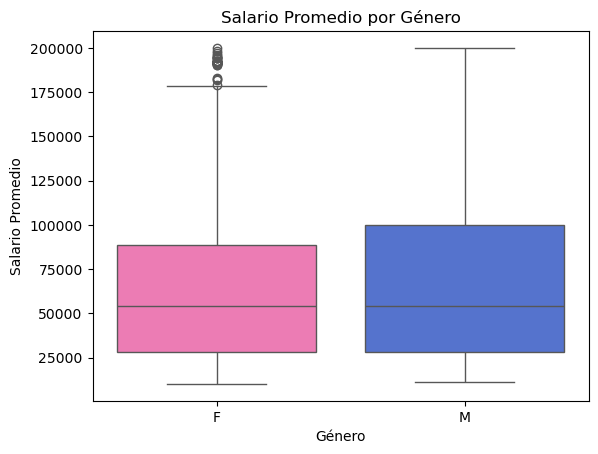

In [134]:
sns.boxplot(x="gender", y=clean_salary, data=df, palette={"F": "#FF69B4", "M": "#4169E1"})
plt.title("Salario Promedio por Género")
plt.xlabel("Género")
plt.ylabel("Salario Promedio")
plt.show()

Usamos un boxplot porque es una forma rápida y visual de comparar la distribución de salarios entre hombres (M) y mujeres (F), mostrando la mediana, los rangos y los posibles valores atípicos.

Conclusión:
Aunque la mediana salarial es similar entre géneros, los hombres tienen una mayor variabilidad y más salarios altos extremos, se ve en la mayor altura de su caja y el bigote superior más largo. Por otro lado, las mujeres tienen más outliers, lo que podría indicar que algunas pocas ganan mucho más, pero no es lo común.  Más valores atípicos por arriba, pero menos dispersión general.

En resumen, aunque en promedio están más o menos iguales, hay más desigualdad interna entre los hombres, y menos mujeres alcanzan esos salarios extremos.

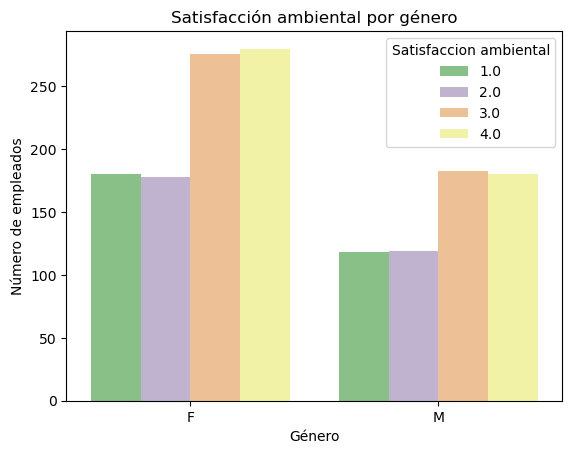

In [135]:
# Gráfico principal
sns.countplot(
    x="gender",
    data=df,
    palette="Accent",
    hue= clean_en_sat
)
plt.title("Satisfacción ambiental por género")
plt.xlabel("Género")
plt.ylabel("Número de empleados")
plt.legend(title='Satisfaccion ambiental');

Usamos un countplot para contar y comparar cantidades en categorías, en este caso, la satisfacción con el ambiente laboral según género.

Conclusión:
Tanto hombres como mujeres tienden a tener puntuaciones altas (3 y 4) en satisfacción, pero hay más mujeres en general en cada nivel. La distribución es bastante parecida entre géneros, así que no parece haber grandes diferencias en cómo perciben el ambiente laboral.

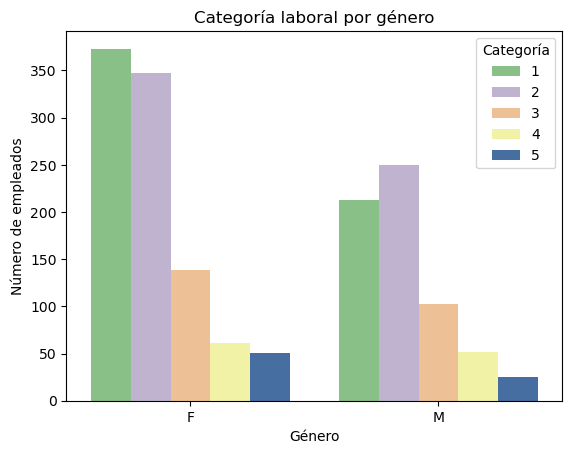

In [137]:
# Gráfico principal
sns.countplot(
    x="gender",
    data=df,
    palette="Accent",
    hue= "joblevel"
)
plt.title("Categoría laboral por género")
plt.xlabel("Género")
plt.ylabel("Número de empleados")
plt.legend(title='Categoría');

Usamos un countplot porque queremos ver cuántas personas hay en cada combinación de género y nivel de trabajo.

Conclusión:
Hay más mujeres que hombres en todos los niveles de trabajo, especialmente en los niveles bajos (1 y 2). A medida que sube el nivel (más alto el joblevel), hay menos personas en general, y también se nota que hay menos hombres en los niveles altos.





Al analizar los gráficos, observamos que las mujeres son mayoría en la empresa y están presentes en todos los niveles jerárquicos, incluso en los más altos. Sin embargo, a pesar de ser más, los hombres tienden a tener salarios promedio ligeramente más altos, especialmente en niveles educativos más altos, como maestrías y doctorados.

Esto sugiere que el género podría estar influyendo en la experiencia laboral, y por lo tanto también en la satisfacción y retención de empleados, que era nuestro objetivo principal en el proyecto.

Para mejorar la satisfacción y retención de todo el personal, podríamos recomendar a la empresa lo siguiente:

Si bien las mujeres ocupan todos los niveles, su salario promedio sigue siendo más bajo, lo cual podría hacer que se sientan menos valoradas o con menos oportunidades de crecimiento.

Esto podría aumentar el riesgo de rotación en ese grupo si no se toman medidas.

Sugerimos que la empresa revisite sus políticas de igualdad salarial y crecimiento profesional, para asegurarse de que no haya barreras invisibles para el ascenso de las mujeres.

También se podría investigar si hay factores dentro de la empresa que estén limitando el acceso de mujeres a los salarios más altos, especialmente en niveles educativos avanzados.
